## Intialization

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch

In [22]:
torch.manual_seed(0)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

## Data Part

(1000, 2) (1000,)


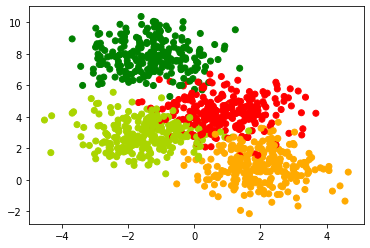

In [24]:
data, labels = make_blobs(n_samples = 1000, n_features = 2, centers = 4, random_state= 0)
print(data.shape, labels.shape)
plt.scatter(data[:,0],data[:,1],c = labels, cmap = my_cmap)
plt.show()

In [25]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


## Exercise 1

In [0]:
import torch.nn.functional as F
import torch.nn as nn
from torch import optim

In [0]:
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 2), 
        nn.Sigmoid(), 
        nn.Linear(2, 4), 
        nn.Softmax()
    )
  
  def forward(self,X):
    return self.net(X)

In [0]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

def fit(x,y, model, opt, loss_fn, epochs = 1000):
  loss_arr = []
  acc_arr = []

  for epoch in range(epochs):
    
    y_hat = model(x)
    loss = loss_fn(y_hat,y)

    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()

  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])
  print('Accuracy before training', acc_arr[0])
  print('Accuracy after training', acc_arr[-1]) 


In [29]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))
X_train = X_train.float()
Y_train = Y_train.long()
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


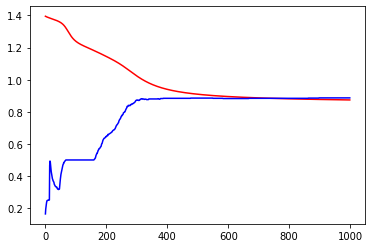

Loss before training 1.395160436630249
Loss after training 0.8738409876823425
Accuracy before training tensor(0.1640)
Accuracy after training tensor(0.8867)


In [37]:
fn = NeuralNet()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
fit(X_train, Y_train, fn, opt, loss_fn)

## Exercise 2

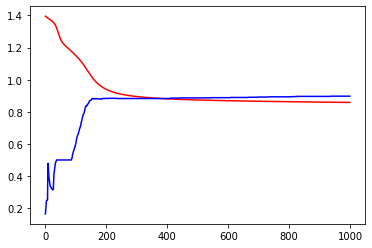

Loss before training 1.395160436630249
Loss after training 0.8583617210388184
Accuracy before training tensor(0.1640)
Accuracy after training tensor(0.8973)


In [38]:
fn1 = NeuralNet()
loss_fn = F.cross_entropy
opt = optim.SGD(fn1.parameters(), lr=1, momentum = 0.5)
fit(X_train, Y_train, fn1, opt, loss_fn)

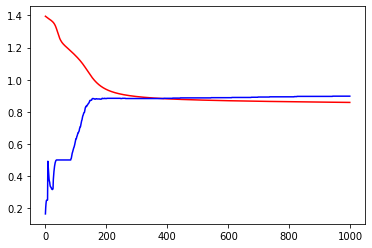

Loss before training 1.395160436630249
Loss after training 0.8584427237510681
Accuracy before training tensor(0.1640)
Accuracy after training tensor(0.8973)


In [41]:
fn2 = NeuralNet()
loss_fn = F.cross_entropy
opt = optim.SGD(fn2.parameters(), lr=1, momentum = 0.5, nesterov = True)
fit(X_train, Y_train, fn2, opt, loss_fn)

## Exercise3

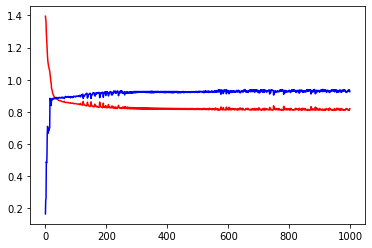

Loss before training 1.395160436630249
Loss after training 0.8193103075027466
Accuracy before training tensor(0.1640)
Accuracy after training tensor(0.9253)


In [42]:
fn1 = NeuralNet()
loss_fn = F.cross_entropy
opt = optim.RMSprop(fn1.parameters(), lr = 0.1, alpha =0.9, momentum = 0.5)
fit(X_train, Y_train, fn1, opt, loss_fn)

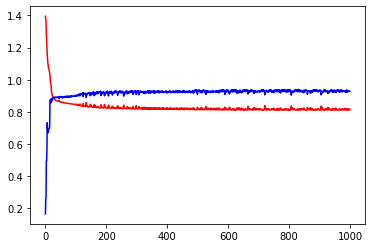

Loss before training 1.395160436630249
Loss after training 0.8159765005111694
Accuracy before training tensor(0.1640)
Accuracy after training tensor(0.9280)


In [43]:
fn1 = NeuralNet()
loss_fn = F.cross_entropy
opt = optim.RMSprop(fn1.parameters(), lr = 0.1, alpha =0.9, momentum = 0.5, centered=True)
fit(X_train, Y_train, fn1, opt, loss_fn)

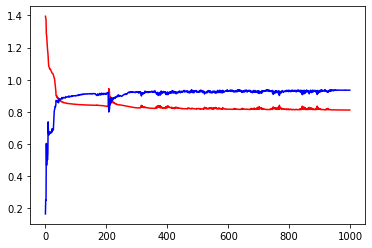

Loss before training 1.395160436630249
Loss after training 0.8110126852989197
Accuracy before training tensor(0.1640)
Accuracy after training tensor(0.9347)


In [44]:
fn1 = NeuralNet()
loss_fn = F.cross_entropy
opt = optim.Adam(fn1.parameters(), lr = 0.5)
fit(X_train, Y_train, fn1, opt, loss_fn)